<a href="https://colab.research.google.com/github/jonnyderme/Neural-Networks-and-Deep-Learning/blob/main/Assignment_2_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and Preprocessing of all datasets used**

In [ ]:
!pip install cvxopt


In [ ]:
import tensorflow

# Import CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras import models,layers
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
import tensorflow.keras.backend as K

from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import f1_score
from sklearn.utils import shuffle



import numpy as np
import time

from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


import numpy as np
from numpy import linalg

import pandas as pd

import time
import random as rnd

from cvxopt import matrix, solvers

In [ ]:
!pip3 install -U ucimlrepo

## **Load and Preprocess UCI-- Handwritten Digits Dataset**


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)

# Split the data into training and testing sets (adjust test_size and random_state as needed)
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

unique, counts = np.unique(yTrain, return_counts=True)
print("Training Labels: ", dict(zip(unique, counts)))
unique, counts = np.unique(yTest, return_counts=True)
print("Testing Labels: ", dict(zip(unique, counts)))

# Get the number of features in the test set
numFeatures = XTrain.shape[1]
print("Number of features in Handwritten Digits:", numFeatures)

# Get the number of classes in the test set
numClasses = 10
print("Number of classes in Handwritten Digits:", numClasses)


print("Train set shape : ", XTrain.shape)
print("Labels for the train set shape :", yTrain.shape)
print("Test set shape :", XTest.shape)
print("Labels for the test set shape :", yTest.shape)

#Convert to float32
XTrain, XTest = np.array(XTrain, dtype=np.float32), np.array(XTest, dtype=np.float32)
yTrain, yTest = np.array(yTrain, dtype=np.float32), np.array(yTest, dtype=np.float32)

#Normalize to [0,1]
XTrain = XTrain/XTrain.max()
XTest =  XTest/XTest.max()

# Change labels of training set: -1 for even numbers, 1 for odd numbers
even = np.where(yTrain%2 == 0)
odd = np.where(yTrain%2 == 1)
yTrain[even] = -1
yTrain[odd] = 1

print("yTrain even shape:", yTrain[even].shape)
print("yTrain odd shape:", yTrain[odd].shape)

# Change labels of test set: -1 for even numbers, 1 for odd numbers
even = np.where(yTest%2 == 0)
odd = np.where(yTest%2 == 1)
yTest[even] = -1
yTest[odd] = 1

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'published_in': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University', 

## **Load and Preprocess Cifar10**

In [ ]:
#Load data
(XTrain, yTrain), (XTest, yTest) = cifar10.load_data()

unique, counts = np.unique(yTrain, return_counts=True)
print("Training Labels: ", dict(zip(unique, counts)))
unique, counts = np.unique(yTest, return_counts=True)
print("Testing Labels: ", dict(zip(unique, counts)))

# Get the number of features in the test set
numFeatures = XTrain.shape[1]*XTrain.shape[2]*XTrain.shape[3]
print("Number of features in CIFAR-10:", numFeatures)

# Get the number of classes in the test set
numClasses = len(set(yTest.flatten()))
print("Number of classes in CIFAR-10:", numClasses)


print("Train set shape : ", XTrain.shape)
print("Labels for the train set shape :", yTrain.shape)
print("Test set shape :", XTest.shape)
print("Labels for the test set shape :", yTest.shape)

#Convert to float32
XTrain, XTest = np.array(XTrain, dtype=np.float32), np.array(XTest, dtype=np.float32)
yTrain, yTest = np.array(yTrain, dtype=np.float32), np.array(yTest, dtype=np.float32)

# Define the class names
classNames = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Select indices for 'airplane' and 'automobile' classes
classIndices = [classNames.index('car'), classNames.index('frog')]

# Filter train and test data for selected classes
trainMask = np.isin(yTrain, classIndices).flatten()
testMask = np.isin(yTest, classIndices).flatten()

XTrainFiltered = XTrain[trainMask]
yTrainFiltered = yTrain[trainMask]

XTestFiltered = XTest[testMask]
yTestFiltered = yTest[testMask]

# Reshape the images to 1D array
XTrain = XTrainFiltered.reshape(
    (XTrainFiltered.shape[0], -1))
XTest = XTestFiltered.reshape(
    (XTestFiltered.shape[0], -1))


# Keep not normalized Train and Test set
XTrainNotScaled = XTrain
XTestNotScaled = XTest

#Normalize to [0,1]
XTrain = XTrain/XTrain.max()
XTest =  XTest/XTest.max()

yTrain = yTrainFiltered
yTest = yTestFiltered

# Display shapes of the new dataset
print("New dataset images shape:", XTrain.shape)
print("New dataset labels shape:", yTrain.shape)
print("New dataset images shape:", XTest.shape)
print("New dataset labels shape:", yTest.shape)

ind1Train = np.where(yTrain==classIndices[0])
ind2Train = np.where(yTrain==classIndices[1])
yTrain[ind1Train] = -1
yTrain[ind2Train] = 1


ind1Test = np.where(yTest==classIndices[0])
ind2Test = np.where(yTest==classIndices[1])
yTest[ind1Test] = -1
yTest[ind2Test] = 1

170498071/170498071 [==============================] - 6s 0us/step
Training Labels:  {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}
Testing Labels:  {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}
Number of features in CIFAR-10: 3072
Number of classes in CIFAR-10: 10
Train set shape :  (50000, 32, 32, 3)
Labels for the train set shape : (50000, 1)
Test set shape : (10000, 32, 32, 3)
Labels for the test set shape : (10000, 1)
New dataset images shape: (10000, 3072)
New dataset labels shape: (10000, 1)
New dataset images shape: (2000, 3072)
New dataset labels shape: (2000, 1)


## **Load and Preprocess Breast Cancer Wisconsin**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

# Split the data into training and testing sets (adjust test_size and random_state as needed)
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

unique, counts = np.unique(yTrain, return_counts=True)
print("Training Labels: ", dict(zip(unique, counts)))
unique, counts = np.unique(yTest, return_counts=True)
print("Testing Labels: ", dict(zip(unique, counts)))

# Get the number of features in the test set
numFeatures = XTrain.shape[1]
print("Number of features in Breast Cancer Wisconsin:", numFeatures)

# Get the number of classes
numClasses =2
print("Number of classes in Breast Cancer Wisconsin:", numClasses)

print("Train set shape : ", XTrain.shape)
print("Labels for the train set shape :", yTrain.shape)
print("Test set shape :", XTest.shape)
print("Labels for the test set shape :", yTest.shape)

#Convert to float32
XTrain, XTest = np.array(XTrain, dtype=np.float32), np.array(XTest, dtype=np.float32)

# Change labels of training and test set
yTrain = np.where(yTrain  == 'M', -1, 1)
yTest = np.where(yTest  == 'M', -1, 1)

yTrain, yTest = np.array(yTrain, dtype=np.float32), np.array(yTest, dtype=np.float32)

#Normalize to [0,1]
XTrain = XTrain/XTrain.max()
XTest =  XTest/XTest.max()



{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

## **Perform PCA**

In [ ]:
pca = PCA(n_components=0.95).fit(XTrain)
XTrainPCA = pca.transform(XTrain)
XTestPCA  = pca.transform(XTest)

print('Number of features after PCA :',XTrainPCA.shape[1])

Number of features after PCA : 184


# **K Nearest Neighbor and Nearest Centroid Classification**

## **K Nearest Neighbors**

### **Nearest Neighbor with k=1 neighbor**

In [ ]:
knn1Neighbor = KNeighborsClassifier(n_neighbors=1, p=2)   # use Euclidean distance metric

start = time.time()

knn1Neighbor.fit(XTrain, yTrain.ravel())

end = time.time()

print("Training time: {:.3f} seconds".format(end-start))

start = time.time()

score = knn1Neighbor.score(XTest,yTest)
yPred = knn1Neighbor.predict(XTest)
f1 = f1_score(yTest, yPred,average='weighted')  # Calculate F1 score

end = time.time()
print("Testing time: {:.3f} seconds".format(end-start))

print("For the 1-NN classifier accuracy is: {:.4f}".format(score))
print("For the 1-NN classifier, F1 score is: {:.4f}".format(f1))

Training time: 0.036 seconds
Testing time: 22.878 seconds
For the 1-NN classifier accuracy is: 0.7600
For the 1-NN classifier, F1 score is: 0.7470


### **Nearest Neighbor with k=3 neighbors**

In [ ]:
knn3Neighbors = KNeighborsClassifier(n_neighbors=3, p=2)      # use Euclidean distance metric

start = time.time()

knn3Neighbors.fit(XTrain, yTrain.ravel())

end = time.time()
print("Training time: {} seconds".format(end-start))

start = time.time()

score = knn3Neighbors.score(XTest, yTest)
yPred = knn3Neighbors.predict(XTest)
f1 = f1_score(yTest, yPred,average='weighted')  # Calculate F1 score

end = time.time()
print("Testing time: {:.3f} seconds".format(end-start))

print("For the 3-NN classifier accuracy is: {:.4f}".format(score))
print("For the 3-NN classifier, F1 score is: {:.4f}".format(f1))

## **Nearest Centroid**

### **Nearest Centroid Classifier with Euclidean Distance metric**

In [ ]:
nearCentroid = NearestCentroid(metric='euclidean')  # use manhattan distance metric

start = time.time()

nearCentroid.fit(XTrain, yTrain.ravel())

end = time.time()
print("Training time: {:.3f} seconds".format(end-start))

start = time.time()

scoreNearCentroid = nearCentroid.score(XTest,yTest.ravel())
yPred = nearCentroid.predict(XTest)
f1 = f1_score(yTest, yPred,average='weighted')  # Calculate F1 score

end = time.time()
print("Testing time: {:.3f} seconds".format(end-start))

print("For the Nearest Centroid classifier accuracy is: {:.4f}".format(score))
print("For the Nearest Centroid classifier, F1 score is: {:.4f}".format(f1))

### **Nearest Centroid Classifier with Manhattan Distance metric**

In [ ]:
nearCentroid = NearestCentroid(metric='manhattan')  # use manhattan distance metric

start = time.time()

nearCentroid.fit(XTrain, yTrain.ravel())

end = time.time()
print("Training time: {:.3f} seconds".format(end-start))

start = time.time()

scoreNearCentroid = nearCentroid.score(XTest,yTest.ravel())
yPred = nearCentroid.predict(XTest)
f1 = f1_score(yTest, yPred,average='weighted')  # Calculate F1 score

end = time.time()
print("Testing time: {:.3f} seconds".format(end-start))

print("For the Nearest Centroid classifier accuracy is: {:.4f}".format(score))
print("For the Nearest Centroid classifier, F1 score is: {:.4f}".format(f1))

# **SVM Implementation**

## **Kernel functions**

In [ ]:
def linearKernel(x1, x2):
    return np.dot(x1, x2.T)

def gaussianKernel(x, y, sigma):
    return np.exp(-sigma*linalg.norm(x-y)**2)

def sigmoidKernel(x, y, alpha, c):
    return np.tanh(alpha * np.dot(x, y.T) + c)

def polynomialKernel(x, y, degree, constant):
    return (np.dot(x, y.T) + constant) ** degree

# **SVM**

In [ ]:
class SVM(object):

    def __init__(self, kernel=linearKernel, C=None, gamma=None, disp=True ,degree =None , constant=None):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.degree = degree
        self.constant = constant
        self.disp = disp
        if self.C is not None:
            self.C = float(self.C)

    def fit(self, x_train, y_train):
        numSamples, numFeatures = x_train.shape

        if self.disp is True:
            print('Number of samples:', numSamples)
            print('Number of features:', numFeatures)

        # Calculate Gram matrix
        start = time.time()
        K = np.zeros((numSamples, numSamples))
        for i in range(numSamples):
            for j in range(numSamples):
                if self.kernel is linearKernel:
                    K[i,j] = self.kernel(x_train[i], x_train[j])
                elif self.kernel is gaussianKernel:
                    K[i,j] = self.kernel(x_train[i], x_train[j],self.gamma)
                else:
                   K[i,j] = self.kernel(x_train[i], x_train[j], self.degree, self.constant)
        end = time.time()
        if self.disp is True:
            print("Gram matrix elapsed time: {}s\n".format(end-start))

        # Formulate the matrices of the QP problem
        P = matrix(np.outer(y_train,y_train) * K)
        q = matrix(np.ones(numSamples) * -1.0)
        A = matrix(y_train.astype('double'), (1,numSamples))
        b = matrix(0.0)

        if self.C is None:
            G = matrix(np.diag(np.ones(numSamples) * -1))
            h = matrix(np.zeros(numSamples))
        else:
            G_1 = -1*np.identity(numSamples)
            G_2 = np.identity(numSamples)
            G = matrix(np.vstack((G_1, G_2)))
            h_1 = np.zeros(numSamples)
            h_2 = np.ones(numSamples) * self.C
            h = matrix(np.hstack((h_1, h_2)))

        # Solve QP problem
        start = time.time()
        solvers.options['show_progress'] = False
        solution = solvers.qp(P, q, G, h, A, b, )
        end = time.time()

        if self.disp is True:
            print("QP solver elapsed time: {}s\n".format(end-start))

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Find Support Vectors
        svL = (a>0.1)
        self.a = a[svL]
        self.sv = x_train[svL]
        self.sv_y = y_train[svL]

        # Find bias
        if self.kernel is linearKernel:
             self.b = self.sv_y - np.sum(self.kernel(self.sv,self.sv) * self.a * self.sv_y, axis=0)
        elif self.kernel is gaussianKernel:
             self.b = self.sv_y - np.sum(self.kernel(self.sv,self.sv,self.gamma) * self.a * self.sv_y, axis=0)
        else:
             self.b = self.sv_y - np.sum(self.kernel(self.sv,self.sv,self.degree,self.constant) * self.a * self.sv_y, axis=0)
        self.b = np.sum(self.b) / self.b.size


    def predict(self, x_test):
        start = time.time()
        yPred = np.zeros(len(x_test))
        for i in range(len(x_test)):
            for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                if self.kernel is linearKernel:
                    yPred[i] += a * sv_y * self.kernel(x_test[i], sv)
                elif self.kernel is gaussianKernel:
                    yPred[i] += a * sv_y * self.kernel(x_test[i], sv, self.gamma)
                else :
                    yPred[i] += a * sv_y * self.kernel(x_test[i], sv, self.degree, self.constant)
        yPred += self.b
        end = time.time()
        if self.disp is True:
            print("Testing elapsed time: {}s\n".format(end-start))
        return np.sign(yPred).astype(int)

In [ ]:
XTrain = XTrainPCA
XTest = XTestPCA

In [ ]:
# The training subset consists of 2000 samples
randInd = np.random.randint(0,len(XTrain),2000)
XTrain1 = XTrain[randInd,:]
yTrain1 = yTrain[randInd]

randInd2 = np.random.randint(0,len(XTrain),1000)
XTest2 = XTrain[randInd2,:]
yTest2 = yTrain[randInd2]

randInd = np.random.randint(0,len(XTest),1000)
XTest1 = XTest[randInd,:]
yTest1 = yTest[randInd]

XTrain = XTrain1
yTrain = yTrain1

XTest = XTest2
yTest = yTest2

## **Train Model with linear Kernel**

Number of samples: 455
Number of features: 30
Gram matrix elapsed time: 1.2065250873565674s

QP solver elapsed time: 0.3557860851287842s

Testing elapsed time: 0.4353342056274414s

Test set accuracy:  0.8947368421052632
              precision    recall  f1-score   support

        -1.0       0.79      0.98      0.88        43
         1.0       0.98      0.85      0.91        71

    accuracy                           0.89       114
   macro avg       0.89      0.91      0.89       114
weighted avg       0.91      0.89      0.90       114

              precision    recall  f1-score   support

        -1.0       0.79      0.98      0.88        43
         1.0       0.98      0.85      0.91        71

    accuracy                           0.89       114
   macro avg       0.89      0.91      0.89       114
weighted avg       0.91      0.89      0.90       114



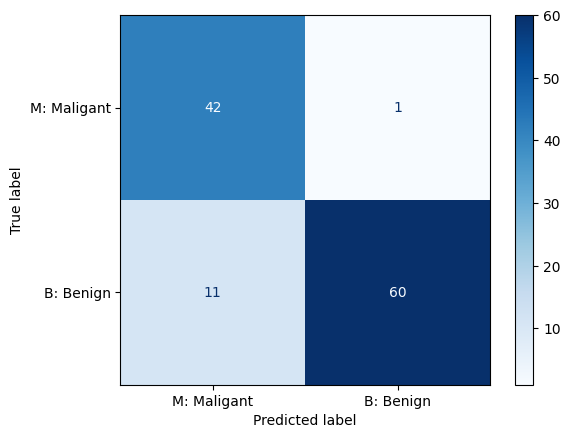

In [ ]:
# Train the model
svm = SVM(kernel=linearKernel, C=1,gamma=None ,disp=True , degree=None , constant=None)
svm.fit(XTrain,yTrain)

# Evaluate on test set
yPred = svm.predict(XTest)

print('Test set accuracy: ', accuracy_score(yTest,yPred))
print(classification_report(yTest, yPred))

labels = ['M: Maligant','B: Benign']
#Create and display confusion matrix
M = confusion_matrix(yTest, yPred)

disp = ConfusionMatrixDisplay(confusion_matrix=M, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show


## **Train Model with gaussian Kernel**

Number of samples: 455
Number of features: 30
Gram matrix elapsed time: 3.9026596546173096s

QP solver elapsed time: 0.5097439289093018s

Testing elapsed time: 1.5202796459197998s

Test set accuracy:  0.9473684210526315
              precision    recall  f1-score   support

        -1.0       1.00      0.86      0.92        43
         1.0       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

              precision    recall  f1-score   support

        -1.0       1.00      0.86      0.92        43
         1.0       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



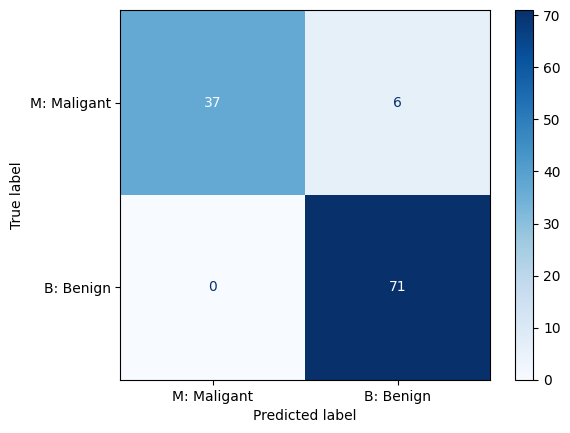

In [ ]:
# Train the model
svm = SVM(kernel=gaussianKernel, C=1,gamma=0.1 ,disp=True , degree=None , constant=None)
svm.fit(XTrain,yTrain)

# Evaluate on test set
yPred = svm.predict(XTest)

print('Test set accuracy: ', accuracy_score(yTest,yPred))
print(classification_report(yTest, yPred))


labels = ['M: Maligant','B: Benign']
#Create and display confusion matrix
M = confusion_matrix(yTest, yPred)

disp = ConfusionMatrixDisplay(confusion_matrix=M, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show

#accuracy, precision, recall and f1-score
print(classification_report(yTest, yPred))

## **Train Model with polynomial Kernel**

Number of samples: 455
Number of features: 30
Gram matrix elapsed time: 3.012148857116699s

QP solver elapsed time: 0.35548996925354004s

Testing elapsed time: 0.8083102703094482s

Test set accuracy:  0.9385964912280702
              precision    recall  f1-score   support

        -1.0       0.89      0.95      0.92        43
         1.0       0.97      0.93      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

              precision    recall  f1-score   support

        -1.0       0.89      0.95      0.92        43
         1.0       0.97      0.93      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



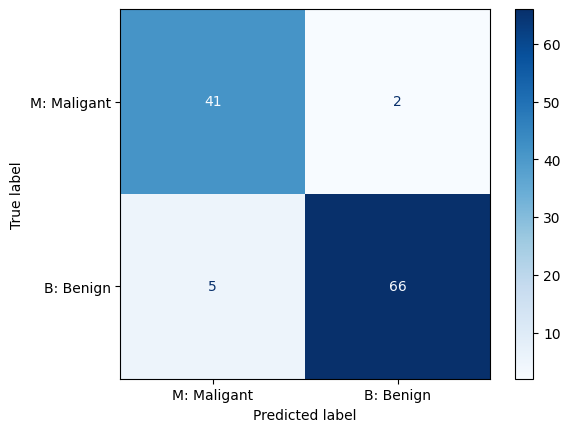

In [ ]:
# Train the model
svm = SVM(kernel=polynomialKernel, C=1,gamma=None ,disp=True , degree=2 , constant=0)
svm.fit(XTrain,yTrain)

# Evaluate on test set
yPred = svm.predict(XTest)

print('Test set accuracy: ', accuracy_score(yTest,yPred))
print(classification_report(yTest, yPred))

labels = ['M: Maligant','B: Benign']
#Create and display confusion matrix
M = confusion_matrix(yTest, yPred)

disp = ConfusionMatrixDisplay(confusion_matrix=M, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show

#accuracy, precision, recall and f1-score
print(classification_report(yTest, yPred))

# **HyperParameter Tuning**

## **Grid Search using also K fold Cross Validation for robustness**



In [ ]:
# Concatenating feature sets (XTrain and XTest)
X = np.concatenate((XTrain, XTest), axis=0)

# Concatenating label sets (yTrain and yTest)
y = np.concatenate((yTrain, yTest), axis=0)

# Combine features and labels into one array for shuffling
XyCombined = np.column_stack((X, y))

# Shuffle the combined dataset
np.random.shuffle(XyCombined)

# Splitting back into X (features) and y (labels)
XTrainU = XyCombined[:, :-1]  # Features are all columns except the last one
yTrainU = XyCombined[:, -1]   # Labels are the last column


### **Grid Search for Linear SVM**

In [ ]:
def tuningLinearSVM(k,CValues,x_train,y_train):

    kfold = StratifiedKFold(n_splits=k,shuffle=True, random_state=42)

    accuracyM = np.zeros(k)
    bestAccuracy = 0
    best_C = None

    numModel = 1

    for i in CValues:
        numFold = 0
        # Create model
        svm_model = SVM(kernel=linearKernel,C=i,disp=False)
        # K fold Cross Validation
        for train, test in kfold.split(x_train, y_train):
            # Train model
            svm_model.fit(x_train[train],y_train[train])

            # Evaluate model on validation set
            y_pred1 = svm_model.predict(x_train[test])
            accuracyM[numFold] = accuracy_score(y_train[test],y_pred1)

            numFold += 1

        # Mean of accuracy for 5-fold cross-validation of a specific model
        acc = np.mean(accuracyM)

        print('Model {}:'.format(numModel))
        print('C = ', i)
        print('Accuracy: {:.4f}'.format(acc))
        print('\n')

        numModel += 1

        # Choose best model based on its accuracy
        if(acc > bestAccuracy):
            bestAccuracy = acc
            best_C = i

    print('Optimal parameters for the model:')
    print('C = ', best_C)
    print('Accuracy: {:.4f}'.format(bestAccuracy))

    return best_C

In [ ]:
# Find best C for the linear SVM
k = 5
CValues = np.array([0.1, 1, 10, 100, 1000 , 10e3 ])
best_C = tuningLinearSVM(k,CValues,XTrainU,yTrainU)

### **Grid Search for Gaussian SVM**

In [ ]:
def tuningGaussianSVM(k,CValues,gammaValues,x_train,y_train):
    kfold = StratifiedKFold(n_splits=k,shuffle=True)

    accFold = np.zeros(k) # accuracy per fold
    bestAccuracy = 0
    best_C = None
    best_gamma = None

    numModel = 1

    for i in CValues:
        for j in gammaValues:

            numFold = 0

            # Create model
            svm_model = SVM(kernel=gaussianKernel, C=i, gamma=j ,disp=False)

            for train, test in kfold.split(x_train, y_train):
                # Train model
                svm_model.fit(x_train[train],y_train[train])

                # Evaluate model on validation set
                y_pred = svm_model.predict(x_train[test])
                accFold[numFold] = accuracy_score(y_train[test],y_pred)

                numFold += 1

            # Mean of accuracy for 5-fold cross-validation of a specific model
            acc = np.mean(accFold)

            print('Model {}:'.format(numModel))
            print('C = ', i)
            print('gamma = ', j)
            print('Accuracy: ', acc)
            print('\n')

            numModel += 1

            # Choose best model based on its accuracy
            if(acc > bestAccuracy):
                bestAccuracy = acc
                best_C = i
                best_gamma = j

    print('\nOptimal parameters for the model:')
    print('C = ', best_C)
    print('gamma = {:.4f}'.format(best_gamma))
    print('Accuracy: {:.4f}'.format(bestAccuracy))

    return best_C, best_gamma

In [ ]:
# Find best C for the gaussian SVM
k = 5
CValues = np.array([1, 10, 100, 1000, 10e3])
gammaValues = np.array([0.01, 0.1 , 1 , 10 , 100])
best_C,best_gamma = tuningGaussianSVM(k,CValues,gammaValues,XTrainU,yTrainU)

### **Grid Search for Polynomial SVM**

In [ ]:
def tuningPolynomialSVM(k,CValues,degreeValues,constantValues,x_train,y_train):
    kfold = StratifiedKFold(n_splits=k,shuffle=True)

    accFold = np.zeros(k)
    bestAccuracy = 0
    best_C = None
    best_degree = 0
    best_constant = -1

    numModel = 1

    for k in CValues:
       for i in degreeValues:
          for j in constantValues:

            numFold = 0

            # Create model
            svm_model = SVM(kernel=polynomialKernel,C=k,gamma=None , degree=i, constant=j ,disp=False)

            for train, test in kfold.split(x_train, y_train):
                # Train model
                svm_model.fit(x_train[train],y_train[train])

                # Evaluate model on validation set
                y_pred = svm_model.predict(x_train[test])
                accFold[numFold] = accuracy_score(y_train[test],y_pred)

                numFold += 1

            # Mean of accuracy for 5-fold cross-validation of a specific model
            acc = np.mean(accFold)

            print('Model {}:'.format(model_no))
            print('C = ', k)
            print('degree = ', i)
            print('constant = ', j)
            print('Accuracy: ', acc)
            print('\n')

            model_no += 1

            # Choose best model based on its accuracy
            if(acc > bestAccuracy):
                bestAccuracy = acc
                best_C = k
                best_degree = i
                best_constant = j


    print('\nOptimal parameters for the model:')
    print('C = ', best_C)
    print('Degree = ', best_degree)
    print('Constant = ',best_constant)
    print('Accuracy: ', bestAccuracy)

    return best_C, best_degree,best_constant

In [ ]:
# Find best C and gamma for the gaussian-kernel SVM
k = 5
CValues = np.array([0.1, 1, 10, 100, 1000])
degreeValues = np.array([2, 3, 4])
constantValues = np.array([0,0.1,1,2])
best_C, best_degree,best_constant = tuningPolynomialSVM(k,CValues,degreeValues,constantValues,XTrainU,yTrainU)